<a href="https://colab.research.google.com/github/mafecala/compuvisual/blob/master/matriz_pixeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Por favor, sube una imagen...


No se cargó ninguna imagen. Descargando imagen de muestra...
Imagen descargada correctamente


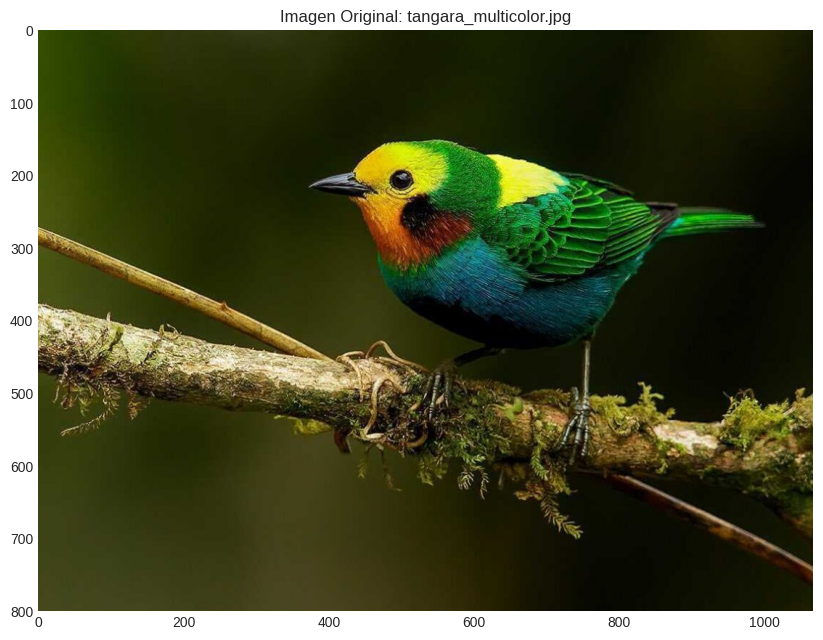

Dimensiones de la imagen: (801, 1068, 3)
Tipo de datos: uint8
Tamaño en memoria: 2506.25 KB

=== Canales RGB ===


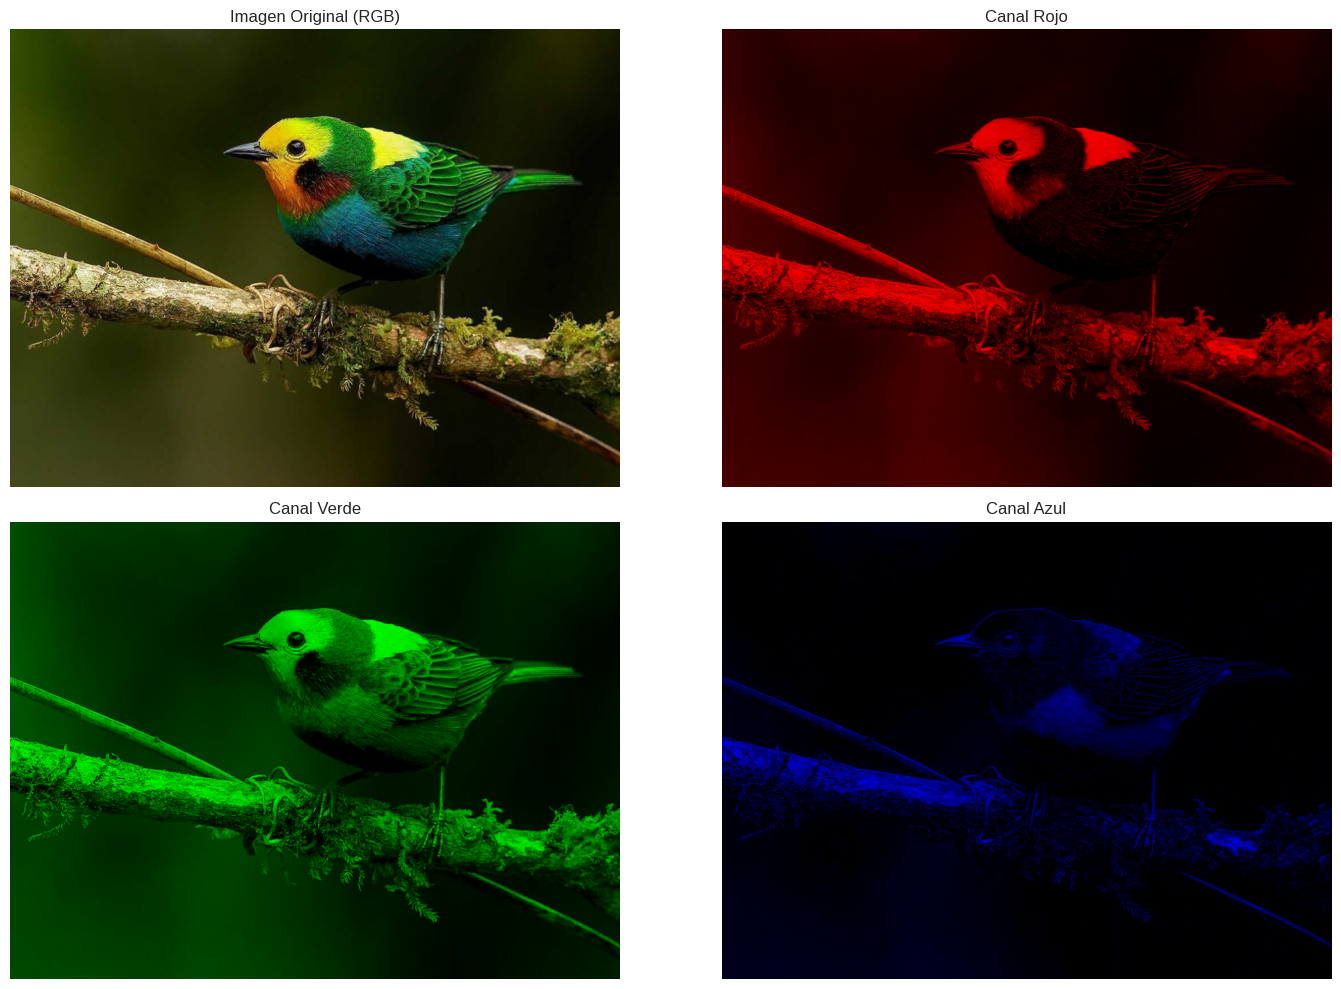

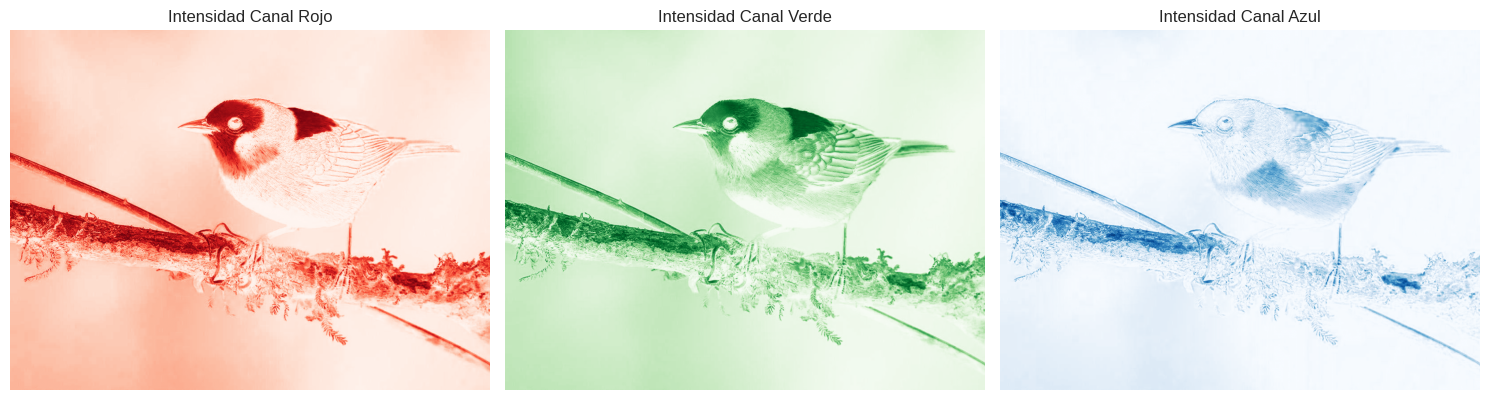


=== Canales HSV ===


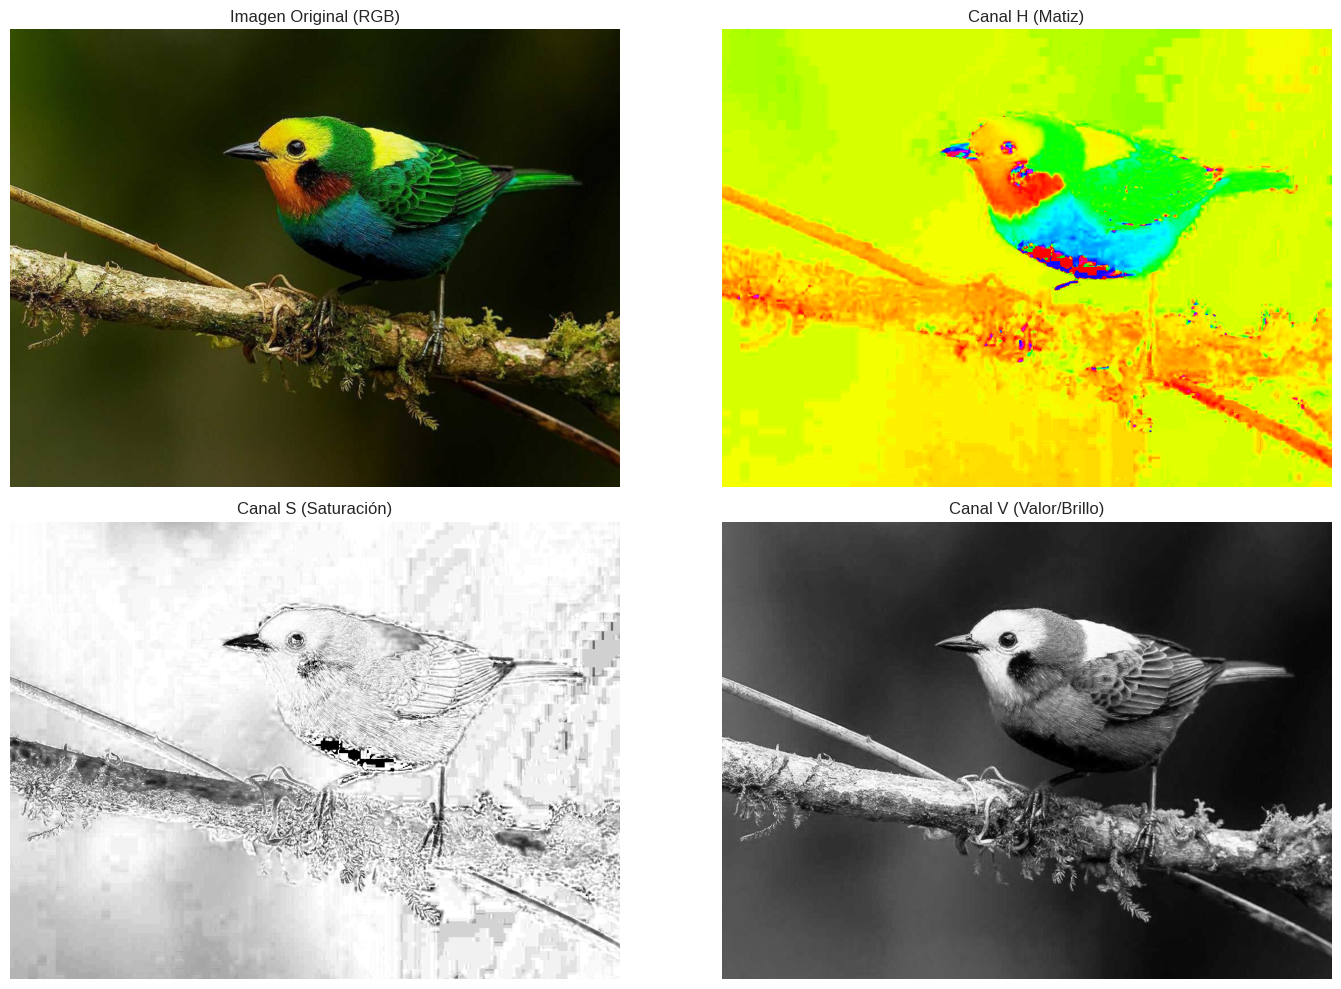


=== Modificación de Regiones ===


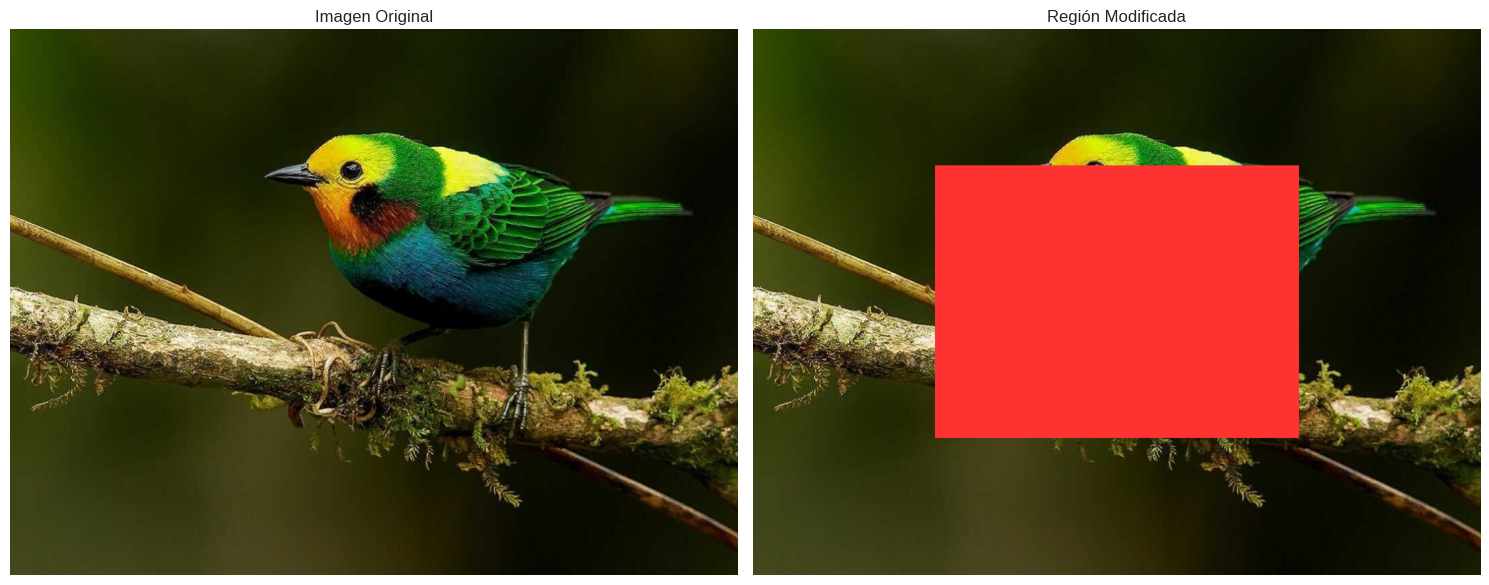

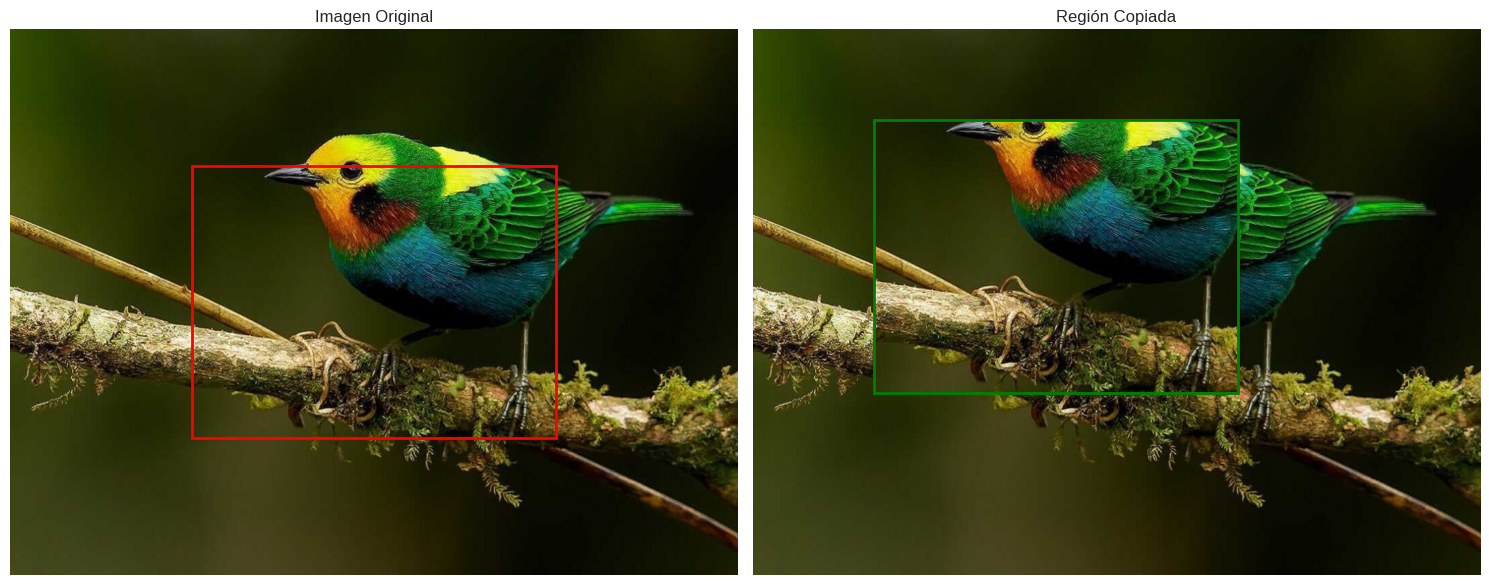


=== Histogramas ===


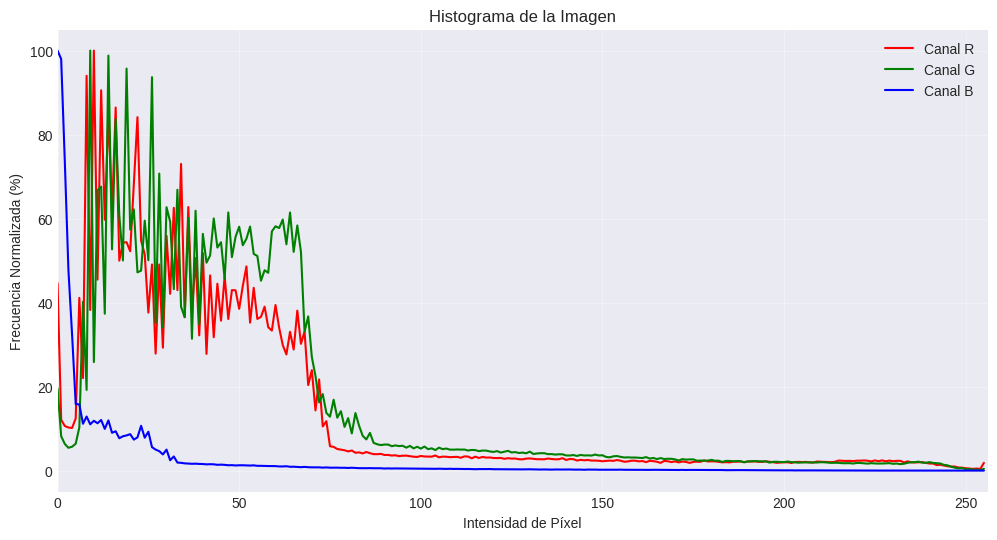

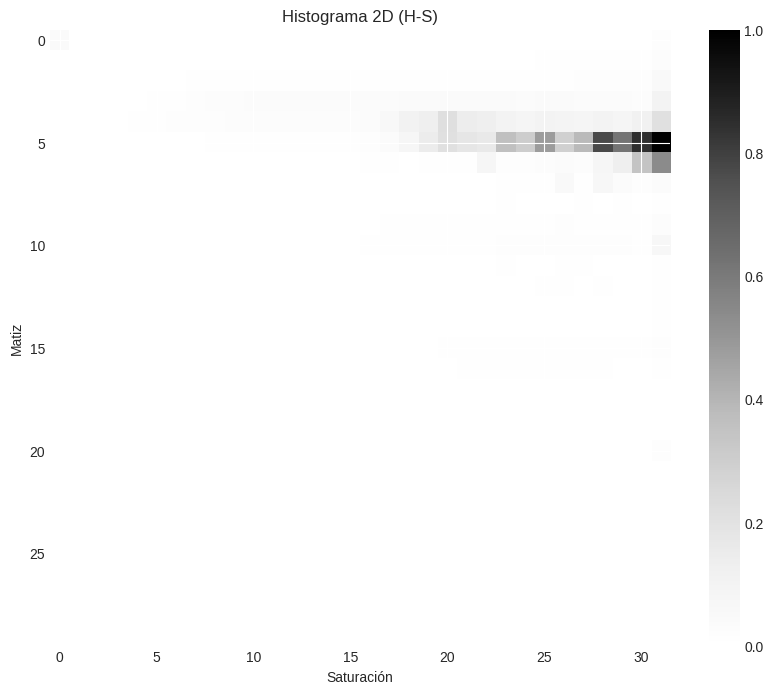


=== Ajustes de Brillo y Contraste ===


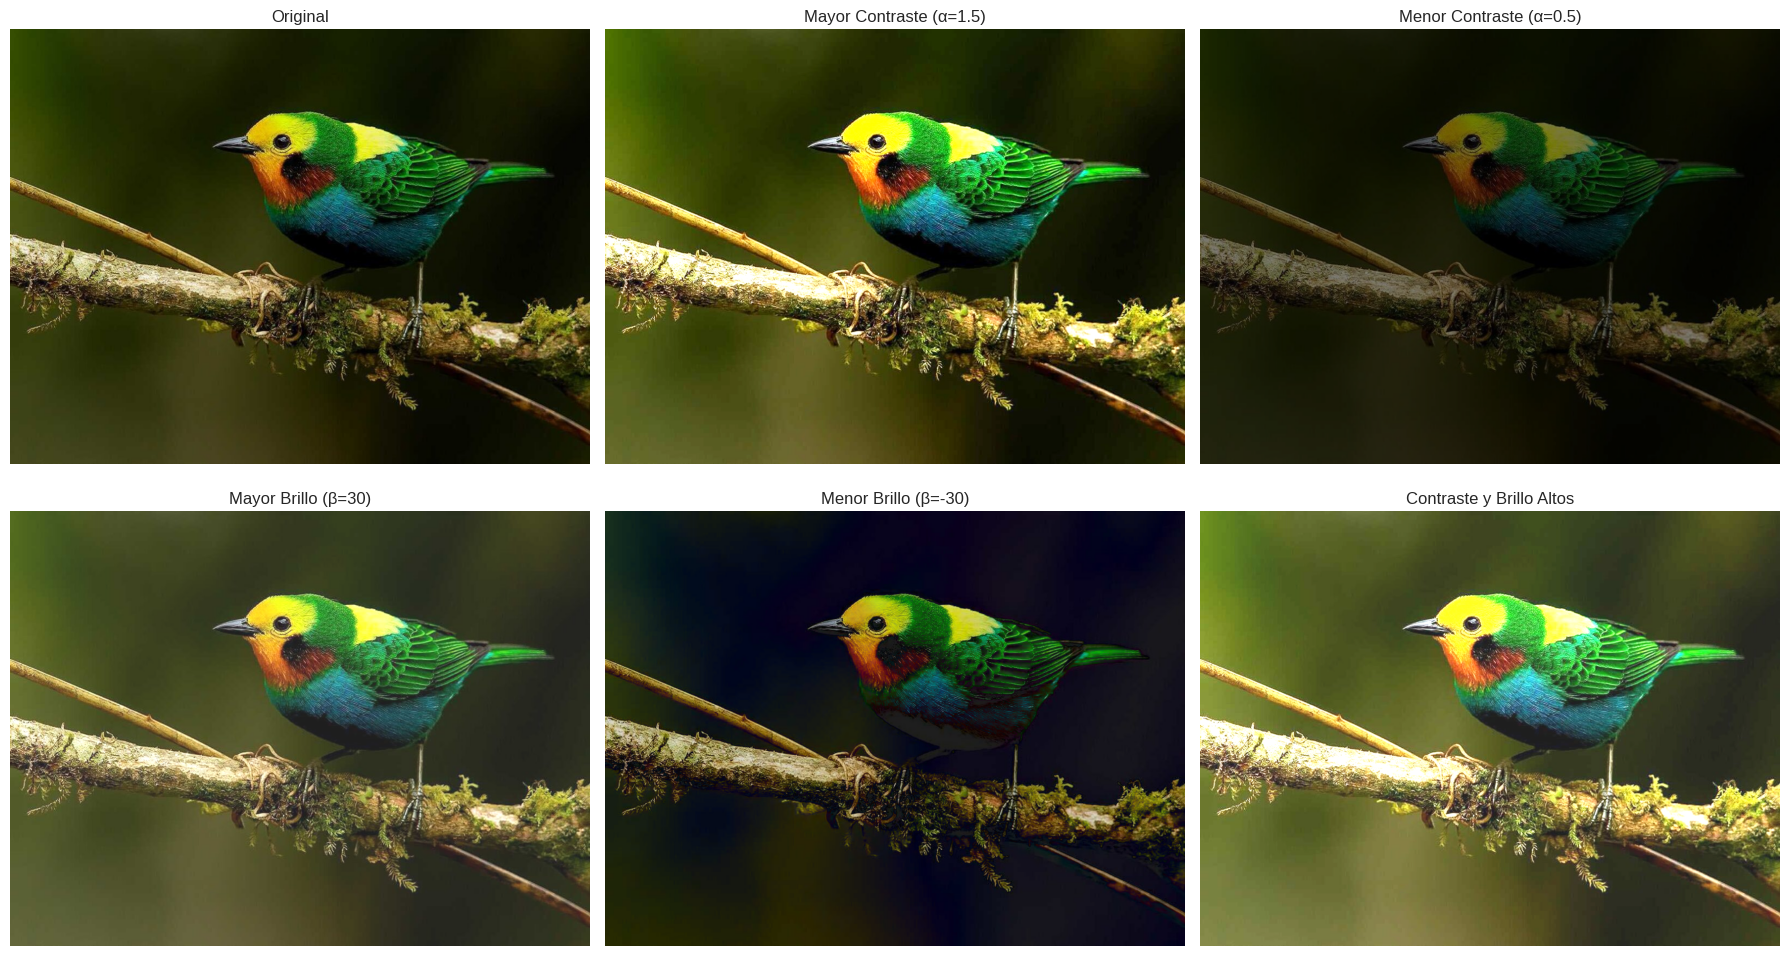


=== Interfaz Interactiva ===
Utiliza los controles siguientes para ajustar la imagen en tiempo real:
Arrastra los sliders para ajustar la imagen:


interactive(children=(FloatSlider(value=1.0, description='Contraste', max=3.0, min=0.1), IntSlider(value=0, de…

In [ ]:
"""
Taller de Procesamiento de Imágenes con OpenCV
==============================================
Este notebook permite explorar una imagen como matriz de píxeles usando OpenCV, NumPy y Matplotlib.
"""

# Instalar OpenCV si es necesario
!pip install opencv-python matplotlib numpy seaborn

# Importar las bibliotecas necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import widgets
from google.colab.patches import cv2_imshow
from google.colab import files
import io

# Configurar matplotlib para visualización en el notebook
plt.style.use('seaborn-v0_8-pastel')
plt.rcParams['figure.figsize'] = (12, 8)

# Función para cargar una imagen desde Google Colab
def cargar_imagen():
    print("Por favor, sube una imagen...")
    uploaded = files.upload()

    for fn in uploaded.keys():
        print(f'Imagen cargada: {fn}')
        img_bytes = uploaded[fn]
        img_array = np.frombuffer(img_bytes, np.uint8)
        img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
        return img, fn

    return None, None

# Cargar una imagen
imagen_original, nombre_imagen = cargar_imagen()

# Si no se cargó ninguna imagen, usar una imagen de muestra de Internet
if imagen_original is None:
    print("No se cargó ninguna imagen. Descargando imagen de muestra...")

    # URL de la imagen de muestra (tangara multicolor)
    url_imagen = "https://www.purosviajes.com/wp-content/uploads/2021/04/Tangara-multicolor-1-1068x801.jpg"

    # Importar urllib para descargar la imagen
    import urllib.request

    # Descargar la imagen
    try:
        # Descargar la imagen desde la URL
        urllib.request.urlretrieve(url_imagen, "imagen_muestra.jpg")
        print("Imagen descargada correctamente")

        # Cargar la imagen con OpenCV
        imagen_original = cv2.imread("imagen_muestra.jpg")

        # Verificar si se cargó correctamente
        if imagen_original is None:
            raise Exception("No se pudo cargar la imagen descargada")

        nombre_imagen = "tangara_multicolor.jpg"

    except Exception as e:
        print(f"Error al descargar la imagen: {e}")
        print("Creando una imagen de muestra alternativa...")

        # Crear una imagen de muestra alternativa si falla la descarga
        imagen_original = np.zeros((400, 600, 3), dtype=np.uint8)
        # Dibujar un degradado
        for i in range(imagen_original.shape[1]):
            color = int(255 * i / imagen_original.shape[1])
            cv2.line(imagen_original, (i, 0), (i, imagen_original.shape[0]), (color, 255-color, 128), 1)
        # Dibujar algunas formas
        cv2.rectangle(imagen_original, (100, 100), (300, 300), (0, 255, 0), 3)
        cv2.circle(imagen_original, (450, 200), 100, (255, 0, 0), -1)
        nombre_imagen = "imagen_muestra_alternativa.jpg"

# Convertir de BGR (OpenCV) a RGB (Matplotlib)
imagen_rgb = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB)

# Mostrar la imagen original
plt.figure(figsize=(10, 8))
plt.imshow(imagen_rgb)
plt.title(f'Imagen Original: {nombre_imagen}')
plt.axis('on')
plt.grid(False)
plt.show()

# Información básica de la imagen
print(f'Dimensiones de la imagen: {imagen_original.shape}')
print(f'Tipo de datos: {imagen_original.dtype}')
print(f'Tamaño en memoria: {imagen_original.nbytes / 1024:.2f} KB')

# ===================== SEPARAR Y VISUALIZAR CANALES DE COLOR =====================

# Separar y mostrar los canales RGB
def visualizar_canales_rgb(imagen):
    # Separar canales
    r, g, b = cv2.split(imagen_rgb)

    # Crear imágenes para cada canal
    zeros = np.zeros_like(r)
    canal_r = cv2.merge([r, zeros, zeros])
    canal_g = cv2.merge([zeros, g, zeros])
    canal_b = cv2.merge([zeros, zeros, b])

    # Mostrar los canales
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    axs[0, 0].imshow(imagen_rgb)
    axs[0, 0].set_title('Imagen Original (RGB)')
    axs[0, 0].axis('off')

    axs[0, 1].imshow(canal_r)
    axs[0, 1].set_title('Canal Rojo')
    axs[0, 1].axis('off')

    axs[1, 0].imshow(canal_g)
    axs[1, 0].set_title('Canal Verde')
    axs[1, 0].axis('off')

    axs[1, 1].imshow(canal_b)
    axs[1, 1].set_title('Canal Azul')
    axs[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

    # Mostrar canal por canal como mapa de calor
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(r, cmap='Reds')
    axs[0].set_title('Intensidad Canal Rojo')
    axs[0].axis('off')

    axs[1].imshow(g, cmap='Greens')
    axs[1].set_title('Intensidad Canal Verde')
    axs[1].axis('off')

    axs[2].imshow(b, cmap='Blues')
    axs[2].set_title('Intensidad Canal Azul')
    axs[2].axis('off')

    plt.tight_layout()
    plt.show()

    return r, g, b

# Separar y mostrar los canales HSV
def visualizar_canales_hsv(imagen):
    # Convertir a HSV
    imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_RGB2HSV)

    # Separar canales
    h, s, v = cv2.split(imagen_hsv)

    # Visualizar HSV
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    axs[0, 0].imshow(imagen_rgb)
    axs[0, 0].set_title('Imagen Original (RGB)')
    axs[0, 0].axis('off')

    # El canal H necesita ser normalizado para visualización
    axs[0, 1].imshow(h, cmap='hsv')
    axs[0, 1].set_title('Canal H (Matiz)')
    axs[0, 1].axis('off')

    axs[1, 0].imshow(s, cmap='Greys_r')
    axs[1, 0].set_title('Canal S (Saturación)')
    axs[1, 0].axis('off')

    axs[1, 1].imshow(v, cmap='Greys_r')
    axs[1, 1].set_title('Canal V (Valor/Brillo)')
    axs[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

    return h, s, v

# Visualizar canales RGB
print("\n=== Canales RGB ===")
r, g, b = visualizar_canales_rgb(imagen_rgb)

# Visualizar canales HSV
print("\n=== Canales HSV ===")
h, s, v = visualizar_canales_hsv(imagen_rgb)

# ===================== MANIPULACIÓN DE REGIONES DE LA IMAGEN =====================

# Crear una copia de la imagen para modificar
imagen_modificada = imagen_rgb.copy()

# Determinar región central para modificar
altura, ancho = imagen_modificada.shape[:2]
x1, y1 = ancho//4, altura//4
x2, y2 = 3*ancho//4, 3*altura//4

# Cambiar el color de un área rectangular
def modificar_region():
    imagen_mod1 = imagen_rgb.copy()
    # Crear una región rectangular de color rojo
    imagen_mod1[y1:y2, x1:x2, 0] = 255  # Canal R
    imagen_mod1[y1:y2, x1:x2, 1] = 50   # Canal G
    imagen_mod1[y1:y2, x1:x2, 2] = 50   # Canal B

    # Mostrar el resultado
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
    ax1.imshow(imagen_rgb)
    ax1.set_title('Imagen Original')
    ax1.axis('off')

    ax2.imshow(imagen_mod1)
    ax2.set_title('Región Modificada')
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

    return imagen_mod1

# Copiar y pegar una región
def copiar_region():
    imagen_mod2 = imagen_rgb.copy()

    # Definir región fuente y destino
    region_fuente = imagen_mod2[y1:y2, x1:x2].copy()

    # Calcular nuevas coordenadas para el destino
    dest_y1, dest_x1 = altura//6, ancho//6
    dest_y2, dest_x2 = dest_y1 + (y2-y1), dest_x1 + (x2-x1)

    # Asegurarse de que las coordenadas están dentro de los límites
    dest_y2 = min(dest_y2, altura)
    dest_x2 = min(dest_x2, ancho)

    # Ajustar tamaño de la región fuente si es necesario
    region_fuente = region_fuente[:dest_y2-dest_y1, :dest_x2-dest_x1]

    # Pegar la región en la nueva ubicación
    imagen_mod2[dest_y1:dest_y2, dest_x1:dest_x2] = region_fuente

    # Mostrar el resultado
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
    ax1.imshow(imagen_rgb)
    ax1.set_title('Imagen Original')
    ax1.add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor='r', facecolor='none'))
    ax1.axis('off')

    ax2.imshow(imagen_mod2)
    ax2.set_title('Región Copiada')
    ax2.add_patch(plt.Rectangle((dest_x1, dest_y1), dest_x2-dest_x1, dest_y2-dest_y1, linewidth=2, edgecolor='g', facecolor='none'))
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

    return imagen_mod2

# Aplicar modificaciones
print("\n=== Modificación de Regiones ===")
imagen_mod1 = modificar_region()
imagen_mod2 = copiar_region()

# ===================== HISTOGRAMAS =====================

# Calcular y visualizar histogramas
def calcular_histogramas(imagen):
    # Convertir a RGB y separar canales
    if len(imagen.shape) == 3:
        # Imagen a color - calcular histograma para cada canal
        colores = ('r', 'g', 'b')
        canales = cv2.split(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    else:
        # Imagen en escala de grises
        colores = ('k',)
        canales = [imagen]

    plt.figure(figsize=(12, 6))

    for i, (canal, color) in enumerate(zip(canales, colores)):
        # Calcular histograma usando cv2.calcHist
        hist = cv2.calcHist([canal], [0], None, [256], [0, 256])

        # Normalizar para visualización
        hist = hist / hist.max() * 100

        # Graficar
        plt.plot(hist, color=color, label=f'Canal {color.upper()}')

    plt.title('Histograma de la Imagen')
    plt.xlabel('Intensidad de Píxel')
    plt.ylabel('Frecuencia Normalizada (%)')
    plt.xlim([0, 256])
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    # Mostrar histograma 2D para visualizar la distribución de colores
    if len(imagen.shape) == 3:
        # Convertir a RGB si es necesario
        if imagen.shape[2] == 3:
            img_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
            # Convertir a HSV para mejor visualización
            img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

            # Calcular histograma 2D para H y S
            h_bins = 30
            s_bins = 32
            histHS = cv2.calcHist([img_hsv], [0, 1], None, [h_bins, s_bins], [0, 180, 0, 256])

            # Normalizar
            cv2.normalize(histHS, histHS, 0, 1, cv2.NORM_MINMAX)

            # Visualizar como mapa de calor
            plt.figure(figsize=(10, 8))
            plt.imshow(histHS, interpolation='nearest', aspect='auto')
            plt.title('Histograma 2D (H-S)')
            plt.xlabel('Saturación')
            plt.ylabel('Matiz')
            plt.colorbar()
            plt.show()

# Calcular histogramas de la imagen original
print("\n=== Histogramas ===")
calcular_histogramas(imagen_original)

# ===================== AJUSTE DE BRILLO Y CONTRASTE =====================

# Función para ajustar brillo y contraste manualmente
def ajustar_brillo_contraste_manual(imagen, alfa, beta):
    # alfa: contraste [0.0-3.0], beta: brillo [-100, 100]
    imagen_ajustada = cv2.convertScaleAbs(imagen, alpha=alfa, beta=beta)
    return imagen_ajustada

# Mostrar diferentes ajustes
def mostrar_ajustes():
    # Definir diferentes valores de contraste y brillo
    ajustes = [
        (1.0, 0),     # Original
        (1.5, 0),     # Aumentar contraste
        (0.5, 0),     # Disminuir contraste
        (1.0, 30),    # Aumentar brillo
        (1.0, -30),   # Disminuir brillo
        (1.5, 30)     # Aumentar contraste y brillo
    ]

    titulos = [
        'Original',
        'Mayor Contraste (α=1.5)',
        'Menor Contraste (α=0.5)',
        'Mayor Brillo (β=30)',
        'Menor Brillo (β=-30)',
        'Contraste y Brillo Altos'
    ]

    # Crear una matriz de subplots
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    axs = axs.ravel()

    for i, ((alpha, beta), titulo) in enumerate(zip(ajustes, titulos)):
        # Ajustar imagen
        imagen_ajustada = ajustar_brillo_contraste_manual(imagen_rgb, alpha, beta)

        # Mostrar imagen
        axs[i].imshow(imagen_ajustada)
        axs[i].set_title(titulo)
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

# Aplicar ajustes de brillo y contraste
print("\n=== Ajustes de Brillo y Contraste ===")
mostrar_ajustes()

# ===================== INTERFAZ INTERACTIVA CON WIDGETS DE MATPLOTLIB =====================

# Función para crear interfaz interactiva con sliders
def crear_interfaz_interactiva():
    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(10, 8))
    plt.subplots_adjust(bottom=0.25)  # Hacer espacio para los sliders

    # Mostrar imagen original
    img_display = ax.imshow(imagen_rgb)
    ax.set_title('Ajuste de Brillo y Contraste')
    ax.axis('off')

    # Crear ejes para los sliders
    ax_contraste = plt.axes([0.25, 0.15, 0.65, 0.03])
    ax_brillo = plt.axes([0.25, 0.1, 0.65, 0.03])

    # Crear sliders
    slider_contraste = widgets.Slider(ax_contraste, 'Contraste', 0.1, 3.0, valinit=1.0, valstep=0.1)
    slider_brillo = widgets.Slider(ax_brillo, 'Brillo', -100, 100, valinit=0, valstep=1)

    # Función de actualización para los sliders
    def actualizar(val):
        # Obtener valores actuales
        contraste = slider_contraste.val
        brillo = slider_brillo.val

        # Ajustar imagen
        imagen_ajustada = ajustar_brillo_contraste_manual(imagen_rgb, contraste, brillo)

        # Actualizar imagen mostrada
        img_display.set_data(imagen_ajustada)

        # Refrescar canvas
        fig.canvas.draw_idle()

    # Conectar sliders a la función de actualización
    slider_contraste.on_changed(actualizar)
    slider_brillo.on_changed(actualizar)

    plt.tight_layout()
    plt.show()

# Código alternativo para Colab que no soporta bien los widgets interactivos de matplotlib
def crear_interfaz_alternativa():
    """
    Interfaz alternativa para Google Colab usando ipywidgets en lugar de matplotlib widgets
    """
    from ipywidgets import interact, FloatSlider, IntSlider
    import IPython.display as display

    # Función para aplicar ajustes y mostrar resultados
    def aplicar_ajustes(contraste=1.0, brillo=0):
        # Ajustar imagen
        imagen_ajustada = ajustar_brillo_contraste_manual(imagen_rgb, contraste, brillo)

        # Mostrar imagen
        plt.figure(figsize=(10, 8))
        plt.imshow(imagen_ajustada)
        plt.title(f'Contraste: {contraste:.1f}, Brillo: {brillo}')
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    # Crear controles interactivos
    print("Arrastra los sliders para ajustar la imagen:")
    interact(
        aplicar_ajustes,
        contraste=FloatSlider(min=0.1, max=3.0, step=0.1, value=1.0, description='Contraste'),
        brillo=IntSlider(min=-100, max=100, step=5, value=0, description='Brillo')
    )

# Crear interfaz interactiva (alternativa para Colab)
print("\n=== Interfaz Interactiva ===")
print("Utiliza los controles siguientes para ajustar la imagen en tiempo real:")
try:
    from ipywidgets import interact, FloatSlider, IntSlider
    crear_interfaz_alternativa()
except ImportError:
    print("ipywidgets no está disponible. Instalando...")
    !pip install ipywidgets
    from ipywidgets import interact, FloatSlider, IntSlider
    crear_interfaz_alternativa()